# WorkPlan
1. Import the Dataset
2. Perform Explatory Data Analysis(EDA)
3. Clean the data and Perform encoding for the columns (Type_of_Transaction - categorical_column)
4. Feature Selection (RidgeCV - Automatically performs Cross Validation)
5. Build and Train(70% of overall model) The following ML models: Tune hyperparameters(cross_validation & grid_search)
    a. Logistic Regression
    b. Decision Tree
    c. Naive Bayes
6. Model Evaluation/Test(30% of overall data not used in Training)
        - Determine the metrics of Intrest
7. Compare the models
8. Build a model with better performance by balancing the classes If possible : demonstrate how it helps.


# Importing Libraries

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [570]:
dataset = pd.read_csv ('Online_transaction_data.csv')
dataset.head()

,Transaction Time,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,Amount,Type_of_Transaction
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Normal
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Normal


## Exploratory Data Analysis

In [571]:
##Quick idea on the columns
#dataset.info()

In [572]:
# # Summary statistics for numerical columns
dataset.describe()

,Transaction Time,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,284805.000000,284806.000000,2.848070e+05,284805.000000,2.848070e+05,284804.000000,284797.000000,...,284805.000000,2.848050e+05,2.848060e+05,284806.000000,2.848060e+05,2.848070e+05,2.848070e+05,2.848060e+05,2.848060e+05,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-0.000012,-0.000001,1.649999e-13,-0.000009,-3.054600e-13,0.000006,0.000002,...,-0.000003,4.184317e-07,-2.594777e-07,0.000001,-3.848964e-07,-6.987102e-13,-5.617874e-13,3.156142e-07,-1.559143e-07,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516254,1.415871,1.380247e+00,1.332261,1.237094e+00,1.194356,1.098628,...,0.770927,7.345266e-01,7.257028e-01,0.624461,6.056481e-01,5.212781e-01,4.822270e-01,4.036332e-01,3.300838e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-4.355724e+01,-73.216718,-13.434066,...,-54.497720,-3.483038e+01,-1.093314e+01,-44.807735,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-0.890372,-0.848642,-6.915971e-01,-0.768296,-5.540759e-01,-0.208629,-0.643096,...,-0.211722,-2.283999e-01,-5.423514e-01,-0.161846,-3.545895e-01,-3.171451e-01,-3.269839e-01,-7.083937e-02,-5.295995e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,0.179845,-0.019848,-5.433583e-02,-0.274187,4.010308e-02,0.022359,-0.051436,...,-0.062481,-2.944510e-02,6.781490e-03,-0.011193,4.097377e-02,1.659350e-02,-5.213911e-02,1.342244e-03,1.124381e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027167,0.743348,6.119264e-01,0.398560,5.704361e-01,0.327347,0.597140,...,0.133031,1.863843e-01,5.285544e-01,0.147642,4.395270e-01,3.507156e-01,2.409522e-01,9.104579e-02,7.828043e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,1.205895e+02,20.007208,15.594995,...,39.420904,2.720284e+01,1.050309e+01,22.528412,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### missing Values

In [573]:
# Check for missing values
print(dataset.isnull().sum())


Transaction Time        0
PCA1                    0
PCA2                    0
PCA3                    2
PCA4                    1
PCA5                    0
PCA6                    2
PCA7                    0
PCA8                    3
PCA9                   10
PCA10                   2
PCA11                   0
PCA12                   4
PCA13                   3
PCA14                   1
PCA15                   3
PCA16                   1
PCA17                   4
PCA18                   2
PCA19                  12
PCA20                   2
PCA21                   2
PCA22                   1
PCA23                   1
PCA24                   1
PCA25                   0
PCA26                   0
PCA27                   1
PCA28                   1
Amount                  0
Type_of_Transaction     0
dtype: int64


In [574]:
# Taking care of missing values
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy= 'mean')
# Fit the imputer and transform the DataFrame; (applying the imputer to all columns)
dataset[dataset.columns[:-1]] = imp_mean.fit_transform(dataset[dataset.columns[:-1]])

In [575]:
# Check for missing values
print(dataset.isnull().sum())


Transaction Time       0
PCA1                   0
PCA2                   0
PCA3                   0
PCA4                   0
PCA5                   0
PCA6                   0
PCA7                   0
PCA8                   0
PCA9                   0
PCA10                  0
PCA11                  0
PCA12                  0
PCA13                  0
PCA14                  0
PCA15                  0
PCA16                  0
PCA17                  0
PCA18                  0
PCA19                  0
PCA20                  0
PCA21                  0
PCA22                  0
PCA23                  0
PCA24                  0
PCA25                  0
PCA26                  0
PCA27                  0
PCA28                  0
Amount                 0
Type_of_Transaction    0
dtype: int64


In [585]:
# Split the independent and Dependent Variables
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

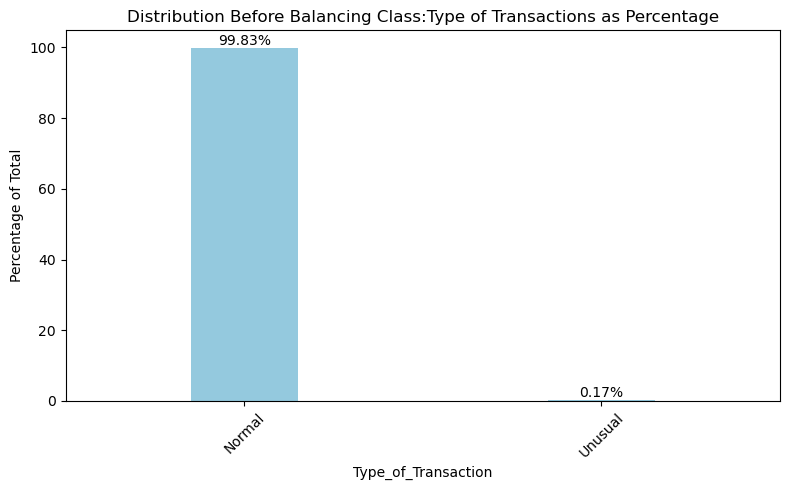

In [746]:
# Bar Graph for Normal Vs Unusual Transactions

Type_of_Transaction_counts = dataset['Type_of_Transaction'].value_counts(normalize=True) * 100

# Create a bar plot with percentages
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=Type_of_Transaction_counts.index, y=Type_of_Transaction_counts.values,width=0.3, color='skyblue')

# Add data labels on top of the bars
for index, value in enumerate(Type_of_Transaction_counts.values):
    # Use ax.text to place a label at the specified location
    ax.text(x=index, y=value, s=f"{value:.2f}%", ha='center', va='bottom')

plt.title('Distribution Before Balancing Class:Type of Transactions as Percentage')
plt.xlabel('Type_of_Transaction')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [747]:
print(x)
print(len(x))

[[ 7.68660000e+04  1.25722726e+00  4.08096201e-01 ... -1.82280080e-02
   3.23610760e-02  1.78000000e+00]
 [ 7.68680000e+04  1.25477495e+00  3.75339963e-01 ... -2.10997340e-02
   3.16864300e-02  2.69000000e+00]
 [ 7.68700000e+04 -1.05069693e+00  1.50075315e+00 ...  5.47241106e-01
   2.78780368e-01  1.29000000e+00]
 ...
 [ 1.69351000e+05 -6.76142671e-01  1.12636606e+00 ...  3.85107449e-01
   1.94361479e-01  7.78900000e+01]
 [ 1.69966000e+05 -3.11383161e+00  5.85864172e-01 ...  8.84875540e-01
  -2.53700319e-01  2.45000000e+02]
 [ 1.70348000e+05  1.99197610e+00  1.58475887e-01 ...  2.98758200e-03
  -1.53088130e-02  4.25300000e+01]]
984


In [748]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Encoding

In [591]:
# Encoding the Dependent Variable y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [744]:
print(y)
print(x.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

#### Balancing The Class: Under_Sampling (Normal Vs Unussual)

In [712]:
from imblearn.under_sampling import NearMiss

# Implementing under sampling for balancing Imbalanced
nm = NearMiss()
x,y = nm.fit_resample(x,y)

print(x.shape,y.shape)

(984, 30) (984,)


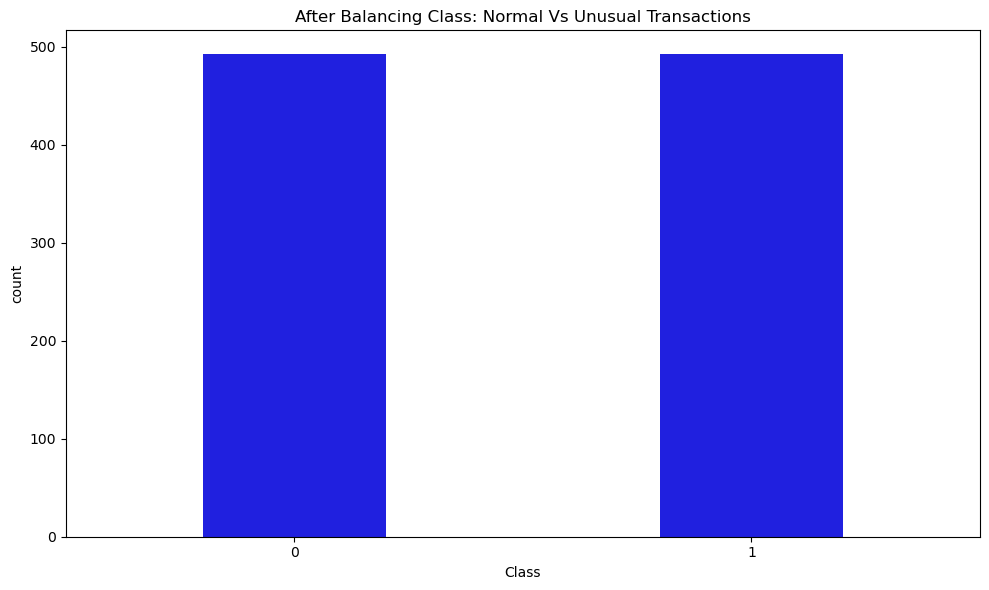

In [742]:
plt.figure(figsize=(10,6))
sns.countplot(x=y, width = 0.4, color = 'blue') 
plt.title('Distribution After Balancing Class:Type of Transactions')
plt.xlabel('Class')

# Show the plot
plt.tight_layout()
plt.show()

In [713]:
# from sklearn.ensemble import RandomForestClassifier

# # Feature selection using Random Forest
# forest = RandomForestClassifier()
# forest.fit(x, y)
# importances = forest.feature_importances_
# print(importances)
# print(len('importances'))

## Feature Selection

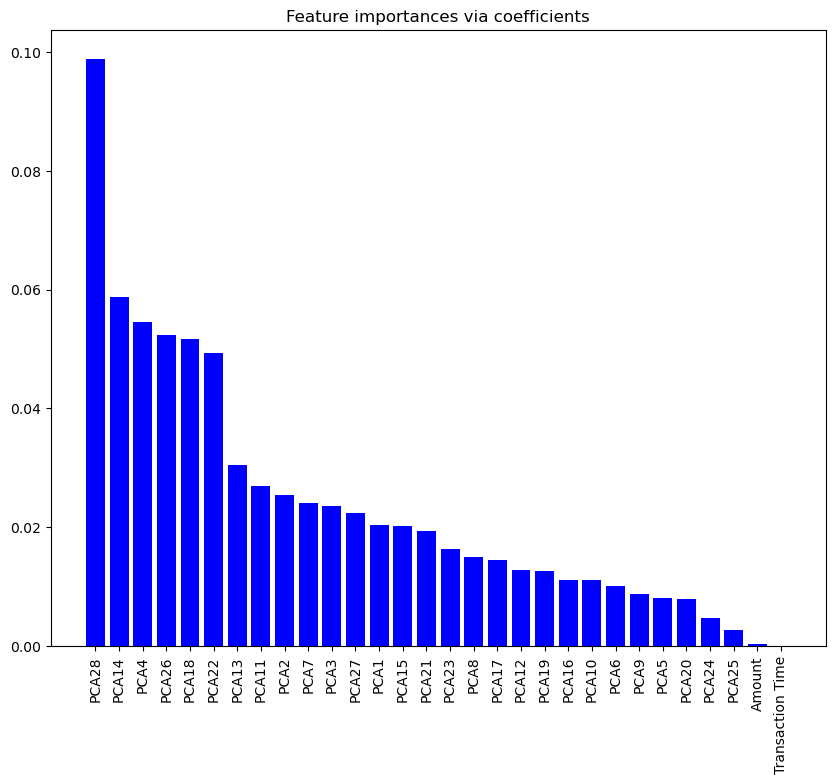

In [714]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(dataset.columns[:-1])  # Assuming features are all but last column

# Create a list of tuples (importance, feature name), sort it by importance in descending order
sorted_features = sorted(zip(importance, feature_names), reverse=True, key=lambda x: x[0])
# Unzip the sorted tuples back into separate lists
sorted_importance, sorted_feature_names = zip(*sorted_features)

plt.figure(figsize=(10, 8))  
plt.bar(sorted_feature_names, sorted_importance, color='blue')  
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90)  # Rotate labels if they overlap
plt.show()

In [715]:
# Most Important features selected for the model based on analysis above
df1 = pd.DataFrame(x,columns = dataset.columns[:-1])
x1 = df1.loc[:,['PCA28','PCA14','PCA4','PCA26','PCA18','PCA22','PCA13','PCA11','PCA2','PCA7','PCA3','PCA27','PCA1','PCA15','PCA21']]
x1

,PCA28,PCA14,PCA4,PCA26,PCA18,PCA22,PCA13,PCA11,PCA2,PCA7,PCA3,PCA27,PCA1,PCA15,PCA21
0,0.032361,-0.435499,0.685011,0.092261,-0.388480,-0.770134,0.968874,0.055638,0.408096,0.136991,0.319266,-0.018228,1.257227,1.012926,-0.279430
1,0.031686,-0.352550,0.691077,0.093208,-0.339299,-0.803506,0.553968,-0.010006,0.375340,0.110222,0.311959,-0.021100,1.254775,1.058069,-0.283275
2,0.278780,-0.281402,-0.282956,0.091830,0.528699,-0.780232,-0.823641,1.100861,1.500753,0.484517,0.846326,0.547241,-1.050697,0.364323,-0.335560
3,0.021871,0.244139,1.111459,-0.330843,-0.241561,0.186705,0.725978,-0.268366,0.419648,0.267398,0.312943,0.018576,1.245537,0.839535,0.035687
4,0.020589,0.089504,0.612765,0.092344,-0.633160,-0.683649,1.067270,-0.091455,0.304662,0.112838,0.527018,-0.024149,1.261137,0.949708,-0.249081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.147968,-6.665177,1.749293,0.788395,-1.315147,-0.319189,-1.235123,2.115795,1.125653,-0.882850,-4.518331,0.292680,-1.927883,0.401701,0.778584
980,0.186637,-5.210141,1.411850,0.739467,-0.688505,0.028234,-0.792532,2.858466,1.289381,-1.413170,-5.004247,0.389152,1.378559,-0.613803,0.370612
981,0.194361,-4.057162,0.468308,0.471111,-0.507000,0.834108,-0.418950,1.794969,1.126366,-2.234739,-2.213700,0.385107,-0.676143,-0.712616,0.751826
982,-0.253700,-6.416628,1.817092,0.606116,-1.478138,-0.269209,-1.127455,1.933520,0.585864,-2.208002,-5.399730,0.884876,-3.113832,0.141237,0.583276


In [716]:
print(x1.isnull().sum())

PCA28    0
PCA14    0
PCA4     0
PCA26    0
PCA18    0
PCA22    0
PCA13    0
PCA11    0
PCA2     0
PCA7     0
PCA3     0
PCA27    0
PCA1     0
PCA15    0
PCA21    0
dtype: int64


## Model Building & Training

In [717]:
# import the libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#### Splitting the dataset into the Training set and Test set

In [718]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=1)


In [721]:
print(X_train)

        PCA28      PCA14      PCA4     PCA26     PCA18     PCA22     PCA13  \
888  0.729526  -0.729707  5.153525  0.630639 -0.597597  1.821422 -0.199814   
661 -0.177587   0.578869  0.847753  0.699175  0.826814  0.835795 -2.136951   
631 -1.071238  -8.199690  6.155789  0.112671 -7.589974  0.652932  1.035166   
791  0.254417 -14.094452  7.031115  0.282435 -6.626975  1.054865  0.101557   
724  0.113684  -4.461051  2.012226 -0.352393  2.284927 -0.891627 -1.757137   
..        ...        ...       ...       ...       ...       ...       ...   
767 -0.394905 -11.608002  5.148263  1.075295 -3.583603 -0.451086  0.251179   
72  -0.068060   0.673384  0.068668 -0.158665 -0.240059  0.287629  0.403695   
908 -0.731801  -7.113873  2.052064 -0.261258 -1.344498 -0.256678 -1.027479   
235  0.106062   0.618893  2.585020 -0.239571 -0.424273 -0.343509 -0.260554   
37   0.030075  -0.137065 -3.109393 -0.107327  0.972380  0.113827  0.560821   

        PCA11      PCA2       PCA7       PCA3     PCA27       P

In [722]:
print(y_train)

[1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0
 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 

In [723]:
# print(X_test)

In [724]:
# print(y_test)

#### Feature Scaling

In [725]:
#Standardizaton(rescaling the data to have mean = 0 and standard deviation = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [726]:
print(X_train)

[[ 1.66976878  0.60816388  0.92684382 ... -0.42868643  1.33224232
  -0.37189456]
 [-0.5052903   0.8954546  -0.44518493 ...  0.23017163  1.48373384
   0.12122576]
 [-2.64807236 -1.03182969  1.24621399 ... -3.43041573 -0.3277239
  -0.87971895]
 ...
 [-1.83417501 -0.79344451 -0.06143258 ... -0.75339854 -0.87602294
   0.13304479]
 [ 0.17483851  0.90424152  0.10839312 ...  0.3175553  -1.41898732
  -0.13174258]
 [-0.00736248  0.73827516 -1.70612444 ...  0.33246614  0.83392683
  -0.1102694 ]]


In [727]:
print(X_test)

[[-0.03809538  0.119796    0.61456522 ...  0.77913286 -1.41920668
  -0.23138997]
 [-0.0439718   0.83913101 -0.36021975 ...  0.62630095 -0.16761498
  -0.20791561]
 [-0.01544491  0.80846667 -0.53540778 ...  0.68262918  0.83467197
  -0.22814859]
 ...
 [-0.04661827  0.72958574 -1.51331151 ...  0.72624812  0.79318485
  -0.2191363 ]
 [-0.01837916  0.64420844 -1.1675948  ...  0.71146347  0.9032909
  -0.14626749]
 [-0.15992274 -0.42101508  0.26275707 ... -0.12130511 -0.26145015
  -0.05154669]]


#### Logistic Regression

#### Training the Logistic Regression model on the Training set

In [728]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Predicting the Test set results

In [729]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]

In [755]:
#### Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(cm)
# accuracy_score(y_test, y_pred)
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       142
           1       0.97      0.88      0.93       154

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

[[138   4]
 [ 18 136]]
Logistic Regression ROC-AUC: 0.927473934516188


#### Decision Tree

In [732]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [733]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
tree_pred = tree_model.predict(X_test)

# Evaluation
print(classification_report(y_test, tree_pred))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, tree_pred))


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       142
           1       0.93      0.92      0.93       154

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Decision Tree ROC-AUC: 0.9258276934333272


#### Naïve Bayes

In [734]:
# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)


GaussianNB()

In [752]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
nb_pred = nb_model.predict(X_test)

# Evaluation
print(classification_report(y_test, nb_pred))
print("Naive Bayes ROC-AUC:", roc_auc_score(y_test, nb_pred))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88       142
           1       0.94      0.82      0.88       154

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.89      0.88      0.88       296

Naive Bayes ROC-AUC: 0.8809218950064021


## Conclusion

#### Overall summary

The best model is Logistic Regression with ROC-AUC of 92.74% followed closely with Decision Tree with ROC-AUC of 92.58% (Could be argued that they are at a tie)
Naive Bayes has an ROC-AUC of 88.09%

### How did balancing the classes help?

Before balancing the classes, we had a case of over fitting of the model with the majority of the class(Normal) having an F1 Score of 100%. After balancing the class the issue has been resolved and the model is now performing better.

#### HyperParameter tuning and feature selesction

RidgeCV is a class from the scikit-learn Python library which is designed for ridge regression that includes built-in cross-validation capabilities.
It allows for the automatic tuning of the parameters through cross-validation and ranking features based on their importances.
In this model, the threshold used was 50% of the most important features to build the model.

#### Key
ROC-AUC - Receiver Operating Characteristic - Area Under the Curve (metric used to evaluate the performance of a binary classification model)